In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# 数据导入与查看
data = pd.read_csv("./credit_data_simulate.csv")

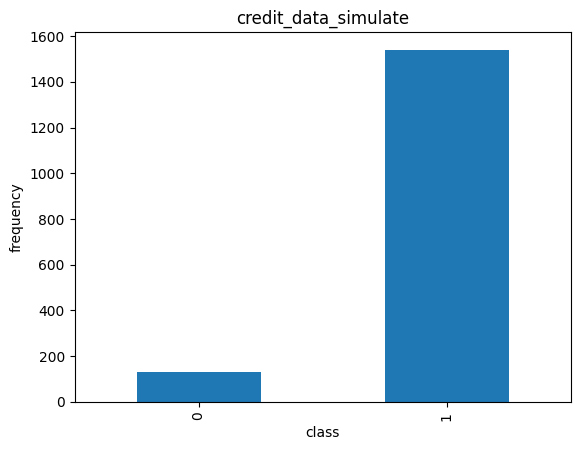

In [3]:
# 查看标签分布
count_classes = pd.value_counts(data['Credit status'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("credit_data_simulate")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [4]:
# #数据标准化处理
# data['norm1']=StandardScaler().fit_transform(data['Market Value of Equity / Book Value of Total Debt (MVE_BVTD)'].values.reshape(-1,1))
# data['norm2']=StandardScaler().fit_transform(data['Industry sector labels from 1-12'].values.reshape(-1,1))

In [5]:
# #下采样
# X=data.iloc[:,data.columns!='Credit status']
# y=data.iloc[:,data.columns=='Credit status']
# # 得到所有异常样本的索引
# number_fraud=len(data[data['Credit status']==0])
# fraud_indices=np.array(data[data['Credit status']==0].index)
# # 得到所有正常样本的索引
# normal_indices=data[data['Credit status']==1].index
# # 在正常样本中随机采样出指定个数的样本，并取其索引
# random_normal_indices=np.random.choice(normal_indices,number_fraud,replace=False)
# random_normal_indices=np.array(random_normal_indices)
# # 有正常样本和异常样本的索引
# under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
# #根据索引得到下采样所有样本点
# under_sample_data=data.iloc[under_sample_indices,:]

In [6]:
# X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Credit status']
# y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Credit status']
# X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(X_undersample,y_undersample,random_state=0)

In [7]:
X = data.iloc[:, data.columns != 'Credit status']
y = data.iloc[:, data.columns == 'Credit status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

BaggingClassifier 准确率= 1.0
BaggingClassifier sensitivity= 1.0
BaggingClassifier specificity= 1.0
BaggingClassifier precision= 1.0
BaggingClassifier F1_score= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [10]:
# recall_acc=recall_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'召回率=', recall_acc)
# accuracy_acc=accuracy_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'准确率=',accuracy_acc)
# precision_acc=precision_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'精确率=',precision_score(y_test,y_pred))
# metrics_out=confusion_matrix(y_test,y_pred)
# Specificity = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print(bag_clf.__class__.__name__,'特异度=',Specificity)

In [11]:
# bag_clf = BaggingClassifier(SVC(), n_estimators=10, bootstrap=True, max_samples=0.1)
# bag_clf.fit(X_train, y_train)
# y_hat = bag_clf.predict(X_test)

In [12]:
# recall_acc = recall_score(y_test, y_hat)
# accuracy_acc = accuracy_score(y_test, y_hat)
# precision_acc = precision_score(y_test, y_hat)
# metrics_out=confusion_matrix(y_test,y_hat)
# Specificity = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])

In [13]:
# print(bag_clf.__class__.__name__, 'accuracy=', accuracy_acc)
# print(bag_clf.__class__.__name__, 'recall=', recall_acc)
# print(bag_clf.__class__.__name__, 'specificity=', Specificity)

<Figure size 640x480 with 0 Axes>

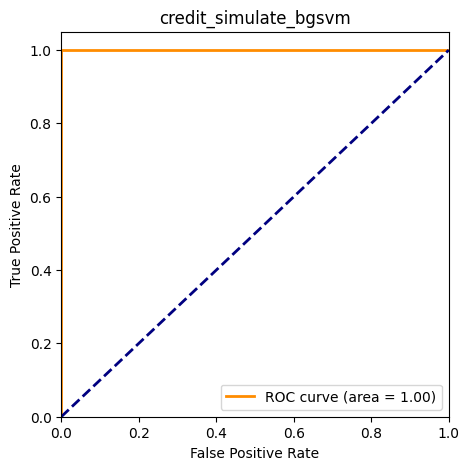

In [14]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('credit_simulate_bgsvm')
plt.legend(loc="lower right")
plt.show()